<a href="https://colab.research.google.com/github/jzj5528/ST-Louis-Vacancy-Project-/blob/main/CrimeVisualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import folium
import matplotlib.pyplot as plt
import seaborn as sns
# magic word for producing visualizations in notebook
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

df = pd.read_csv('/content/gdrive/My Drive/BoozAllenHamilton/CrimeDataLNGnLAT.csv')

In [ ]:
df.dtypes

Unnamed: 0          int64
date_occur         object
crime               int64
description        object
ileads_address      int64
ileads_street      object
x_coord           float64
y_coord           float64
ShortCrimeCode      int64
UCRType             int64
UCRCrime           object
address            object
lat               float64
lon               float64
dtype: object

In [ ]:
df['lat'] = df['lat'].astype(str)
df['lon'] = df['lon'].astype(str)

In [ ]:
df['LATLNG'] = df['lat'] + ", " + df['lon']

In [ ]:
df

,Unnamed: 0,date_occur,crime,description,ileads_address,ileads_street,x_coord,y_coord,ShortCrimeCode,UCRType,UCRCrime,address,lat,lon,LATLNG
0,0,1/1/2015 0:01,67701,LARCENY-FROM BUILDING UNDER $500,50170,S 37TH ST,890961.8,997996.5,6,1,Larceny-theft,"50170 S 37TH ST, St.Louis",38.57416052894661,-90.2525095459492,"38.57416052894661, -90.2525095459492"
1,1,1/1/2015 0:01,41011,AGG.ASSAULT-FIREARM/CITIZEN ADULT 1ST DEGREE,22280,SULLIVAN AVE,904291.2,1027224.0,4,1,Aggravated Assault,"22280 SULLIVAN AVE, St.Louis",38.6543083691258,-90.20555692432907,"38.6543083691258, -90.20555692432907"
2,2,1/1/2015 0:01,64701,LARCENY-FROM MTR VEH UNDER $500,26000,WASHINGTON AVE,901952.4,1020103.0,6,1,Larceny-theft,"26000 WASHINGTON AVE, St.Louis",38.63477525163715,-90.21382466477124,"38.63477525163715, -90.21382466477124"
3,3,1/1/2015 0:01,67601,"LARCENY-FROM BUILDING $500 - $24,999",43110,ARCO AVE,889622.7,1017626.0,6,1,Larceny-theft,"43110 ARCO AVE, St.Louis",38.62807127339907,-90.25701190645528,"38.62807127339907, -90.25701190645528"
4,4,1/1/2015 0:01,65701,LARCENY-MTR VEH PARTS UNDER $500,33000,N KINGSHIGHWAY BLVD,890845.8,1034214.0,6,1,Larceny-theft,"33000 N KINGSHIGHWAY BLVD, St.Louis",38.67361113485902,-90.2525738114595,"38.67361113485902, -90.2525738114595"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133238,133238,9/30/2020 22:00,44013,"AGG.ASSAULT-HNDS,FST,FEET/CTZEN ADLT 3RD DEGRE",19240,N VANDEVENTER AVE,897205.1,1026723.0,4,1,Aggravated Assault,"19240 N VANDEVENTER AVE, St.Louis",38.65299250720071,-90.23037606191824,"38.65299250720071, -90.23037606191824"
133239,133239,9/30/2020 22:14,38421,ROBBERY CARJACKING /STRNGARM/NO INJ/SUCCESSFUL,84300,HALL ST,898344.4,1050289.0,3,1,Robbery,"84300 HALL ST, St.Louis",38.71769238050145,-90.2261400131596,"38.71769238050145, -90.2261400131596"
133240,133240,9/30/2020 22:30,64701,LARCENY-FROM MTR VEH UNDER $500,12370,ORCHID AVE,894384.4,1051248.0,6,1,Larceny-theft,"12370 ORCHID AVE, St.Louis",38.720357340908784,-90.24000978559256,"38.720357340908784, -90.24000978559256"
133241,133241,9/30/2020 23:15,51212,BURGLARY-RESIDENCE/NIT/FORCE ENT/UNOCCUPIED,28210,MERAMEC ST,896299.8,1000102.0,5,1,Burglary,"28210 MERAMEC ST, St.Louis",38.57990109822232,-90.23381645686275,"38.57990109822232, -90.23381645686275"


In [ ]:
pd.value_counts(df['ileads_street'])[:10]

S GRAND BLVD           2928
GRAVOIS AVE            2337
S BROADWAY             2066
WASHINGTON AVE         1889
N BROADWAY             1580
DELMAR BLVD            1577
UNION BLVD             1565
N KINGSHIGHWAY BLVD    1559
CHIPPEWA ST            1535
LINDELL BLVD           1519
Name: ileads_street, dtype: int64

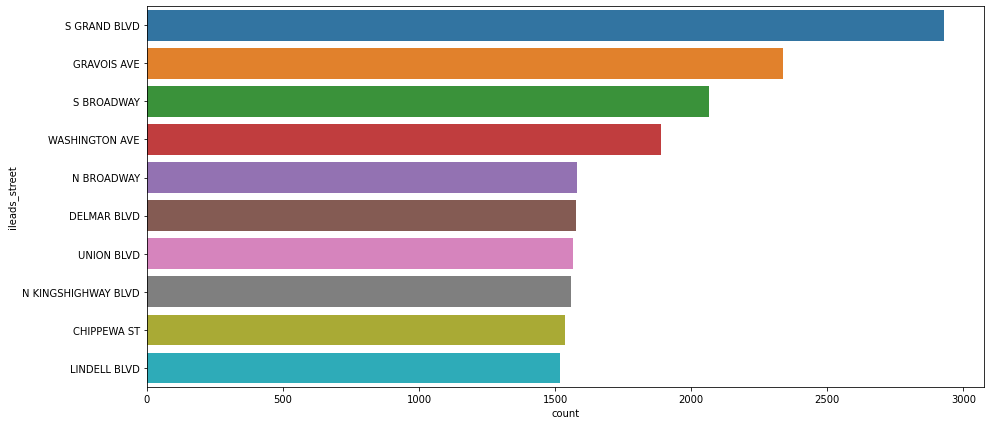

In [ ]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df['ileads_street'],order=df['ileads_street'].value_counts().iloc[:10].index)

In [ ]:
df.drop(df[df['LATLNG'] == 'nan, nan'].index, inplace = True)
# Takes out all the LATS and LNGS that don't have a value

In [ ]:
import sys
sys.setrecursionlimit(1500) # for example 1500

In [ ]:
#count the incident frenquency to each location
unique_locations = df['LATLNG'].value_counts()

PB_index = pd.DataFrame({"LATLNG" : unique_locations.index, "ValueCount":unique_locations})
PB_index.index = range(len(unique_locations))
#map_data=pd.concat([new_df['address'],PB_index], axis=1, join='inner')
map_data=pd.concat([df[['address']],PB_index], axis=1, join='inner')
map_data_head=map_data[:10]
map_data.head()

,address,LATLNG,ValueCount
0,"50170 S 37TH ST, St.Louis","38.59465808780906, -90.2425477483202",442
1,"22280 SULLIVAN AVE, St.Louis","38.592513688826585, -90.29551134593729",427
2,"26000 WASHINGTON AVE, St.Louis","38.63285905980822, -90.18411985543732",331
3,"43110 ARCO AVE, St.Louis","38.635017852305936, -90.26478106188068",324
4,"33000 N KINGSHIGHWAY BLVD, St.Louis","38.678529605438, -90.25942625453015",295


# Incident Visualizations

In [ ]:
head_theft=pd.value_counts(df['UCRCrime'])[:10]
head_theft

Larceny-theft          65784
Aggravated Assault     19297
Burglary               18960
Motor vehicle theft    16106
Robbery                 8716
Arson                   1326
Criminal Homicide       1190
Forcible Rape             12
Name: UCRCrime, dtype: int64

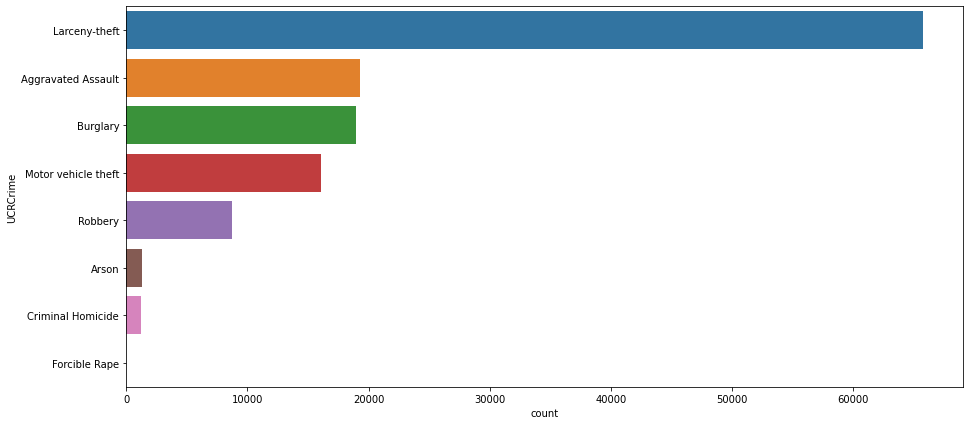

In [ ]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df['UCRCrime'],order=df['UCRCrime'].value_counts().iloc[:10].index)

# Map Visualizations

In [ ]:
stl_crime_street=folium.Map(location=[38.6, -90.2],
                        zoom_start=13,width=1000, height=800)

In [ ]:
stl_crime_street

In [ ]:
import sys
print(sys.getrecursionlimit())

1000


In [ ]:
map_data

,address,LATLNG,ValueCount
0,"50170 S 37TH ST, St.Louis","38.59465808780906, -90.2425477483202",442
1,"22280 SULLIVAN AVE, St.Louis","38.592513688826585, -90.29551134593729",427
2,"26000 WASHINGTON AVE, St.Louis","38.63285905980822, -90.18411985543732",331
3,"43110 ARCO AVE, St.Louis","38.635017852305936, -90.26478106188068",324
4,"33000 N KINGSHIGHWAY BLVD, St.Louis","38.678529605438, -90.25942625453015",295
...,...,...,...
47314,"1000 S 18TH ST, St.Louis","38.64022071863732, -90.22424757813172",1
47315,"1000 S 18TH ST, St.Louis","38.6053393933699, -90.2117646151083",1
47316,"1000 S 18TH ST, St.Louis","38.6075967894032, -90.23268949977638",1
47317,"1000 S 18TH ST, St.Louis","38.615546973134016, -90.20012991035205",1


In [ ]:
for i in range(10):
    lat = map_data['LATLNG'].iloc[i][0]
    long = map_data['LATLNG'].iloc[i][1]
    location=map_data['address'].iloc[i]
    if map_data['ValueCount'].iloc[i] > 800:
        color = 'red'
    elif map_data['ValueCount'].iloc[i] >= 500:
        color = 'orange'
    elif map_data['ValueCount'].iloc[i] < 500:
        color = 'blue'
    
    popup_text = """
                Location: {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(
                               location, 
                               map_data['ValueCount'].iloc[i]
                               )
    folium.Marker(location = [lat, long], popup= popup_text,icon=folium.Icon(color= color)).add_to(stl_crime_street)

RecursionError: ignored

In [ ]:
stl_crime_heatmap=folium.Map(location=[38.6, -90.2],tiles = "Stamen Toner",
                        zoom_start=11)

In [ ]:
# Add data for heatmp 
# data_heatmap = data[['Lat','Long']]
# data_heatmap = data.dropna(axis=0, subset=['Lat','Long'])
from folium.plugins import HeatMap
#HeatMap(map_data.Raw_String, radius=10).add_to(stl_crime_heatmap_1,gradient={.4: 'blue', .65: 'lime', 1: 'red'})
stl_crime_heatmap.add_child(HeatMap(map_data.LATLNG, radius =10, control=False))
folium.map.LayerControl(position='topright').add_to(stl_crime_heatmap)

stl_crime_heatmap

RecursionError: ignored